<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Import-some-libraries" data-toc-modified-id="Import-some-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import some libraries</a></span></li><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Some-helper-functions" data-toc-modified-id="Some-helper-functions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Some helper functions</a></span></li><li><span><a href="#Metric-based" data-toc-modified-id="Metric-based-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Metric-based</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Standard Deviation</a></span></li><li><span><a href="#Skewness" data-toc-modified-id="Skewness-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Skewness</a></span></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Kurtosis</a></span></li><li><span><a href="#Autocorrelation-at-lag-1" data-toc-modified-id="Autocorrelation-at-lag-1-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>Autocorrelation at lag 1</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Early Warning Signals

Detecting critical transitions in timeseries

Author: Alva Presbitero

## Import some libraries

In [126]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import skew, kurtosis
from itertools import product

In [102]:
noise = []
noise_type_list = ['sigmoid', 'gaussian']
sigma_type_list = ['constant', 'increasing']

output = list(product(noise_type_list, sigma_type_list))

for index, (noise_type, sigma_type) in enumerate(output):
    print ('noise_type :', index, noise_type, sigma_type)
    pickle_dir = f'result/pickle/noise/{noise_type}/{sigma_type}/'
    pickle_file = noise_type + '_' + sigma_type + '.pickle'
    with open(pickle_dir + pickle_file, 'rb') as f:
        noise.append(pickle.load(f))
#         print (noise_list[index])

noise_type : 0 sigmoid constant
noise_type : 1 sigmoid increasing
noise_type : 2 gaussian constant
noise_type : 3 gaussian increasing


In [103]:
# noise_1, noise_2, noise_3, noise_4 = noise_list[0], noise_list[1], noise_list[2], noise_list[3]
noise_names = ['Sigmoid (constant sigma)', 'Sigmoid (increasing sigma)', 'Gaussian (constant sigma)', 'Gaussian (increasing sigma)']

## Early Warning Signals

<img src='images/EWS' width="400" height="400">


### Some helper functions

In [104]:
# used to detrend
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

In [139]:
def roll_window(dataset, win_size, func):
    return dataset.rolling(int(win_size), center=True).apply(func)

In [151]:
def plot(data, immune, noise_name, immune_name, method_name, method, win_size):
    diff = pd.DataFrame(difference(data[immune]))

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))
    fig.suptitle(noise_name + ' : ' + immune_name)

    axes[0,0].plot(data[immune])
    axes[0,0].set_title("Data")
    axes[0,0].set_xlabel("Timestep")

    axes[0,1].plot(diff)
    axes[0,1].set_title("Residuals")
    axes[0,1].set_xlabel("Timestep")

    axes[1,0].plot(method(data[immune], win_size))
    axes[1,0].set_title(method_name + " on Data")
    axes[1,0].set_xlabel("Timestep")

    axes[1,1].plot(method(diff, win_size))
    axes[1,1].set_title(method_name + " on Residuals")
    axes[1,1].set_xlabel("Timestep")

    fig.tight_layout()

In [152]:
noise_1.keys()

Index(['N_R', 'AP_Eblood', 'AP_Etissue', 'AP_Eliver', 'AP_Sblood',
       'AP_Stissue', 'ITMblood', 'ITMtissue', 'M_R', 'M_A', 'CH', 'N_A',
       'ND_A', 'ACH', 'ND_N', 'Time'],
      dtype='object')

<AxesSubplot:>

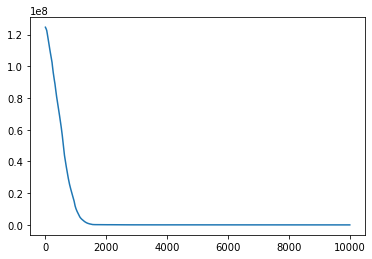

In [153]:
noise_1['AP_Etissue'].plot()

### Metric-based
#### Standard Deviation

In [154]:
def do_ews_std(dataset, win_size):
    return dataset.rolling(int(win_size), center=True).std()

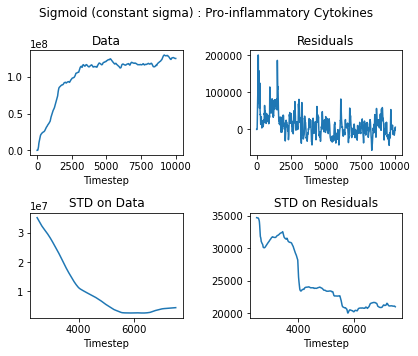

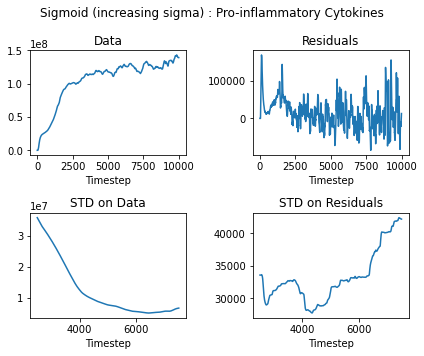

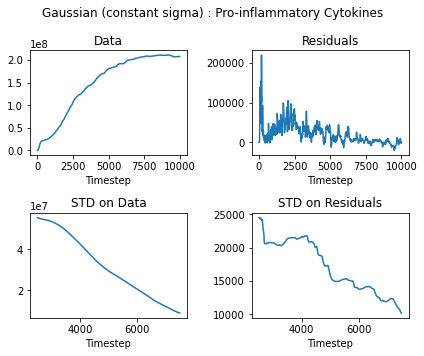

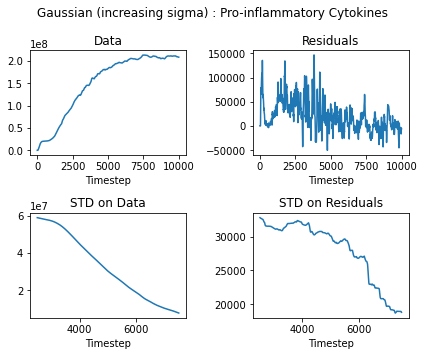

In [155]:
for choice in range(4):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

#### Skewness


In [157]:
def do_ews_skew(dataset, win_size):
    return dataset.rolling(int(win_size)).apply(skew)

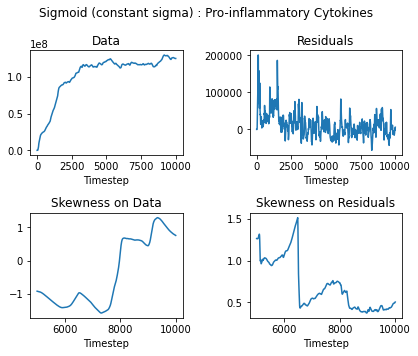

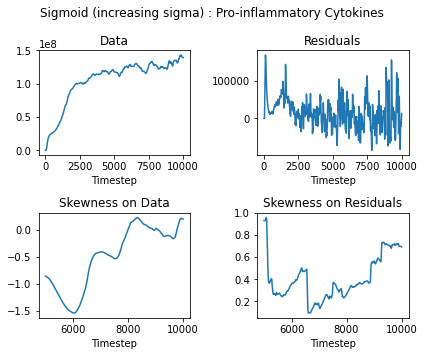

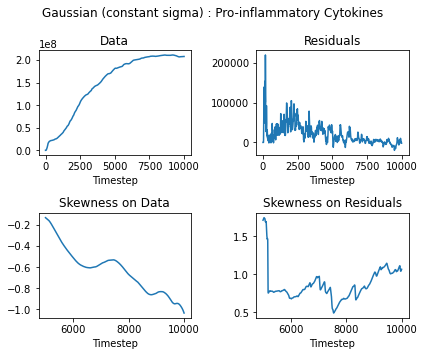

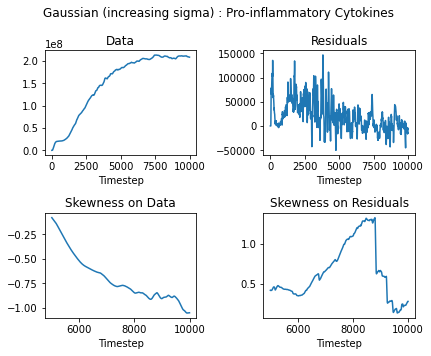

In [158]:
for choice in range(4):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Skewness', 
         method = do_ews_skew,
         win_size = len(noise[choice])/2)

#### Kurtosis

In [161]:
def do_ews_kurt(dataset, win_size):
    return dataset.rolling(int(win_size)).apply(kurtosis)

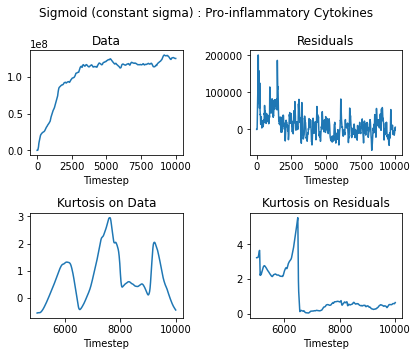

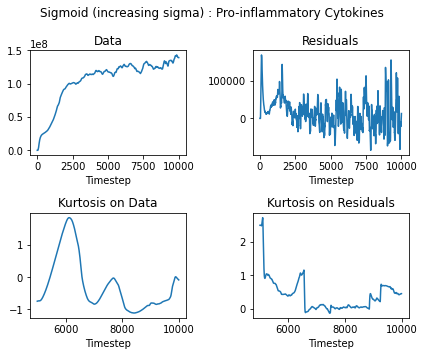

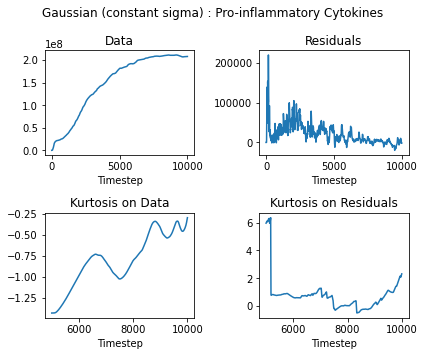

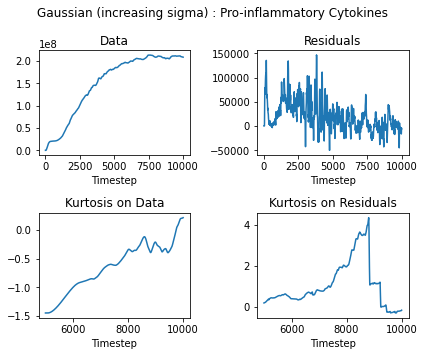

In [162]:
for choice in range(4):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Kurtosis', 
         method = do_ews_kurt,
         win_size = len(noise[choice])/2)

#### Autocorrelation at lag 1

In [166]:
def get_auto(dataset, lag=1):
    return sm.tsa.acf(dataset)[lag]

In [169]:
def do_ews_auto(dataset, win_size, lag=1):
    return dataset.rolling(int(win_size)).apply(get_auto)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


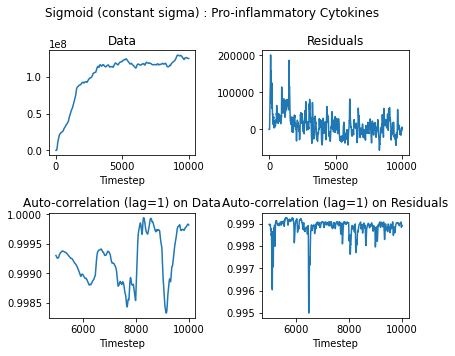

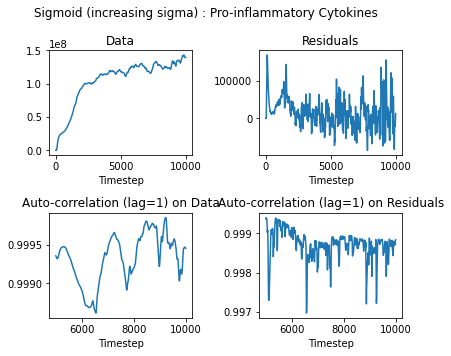

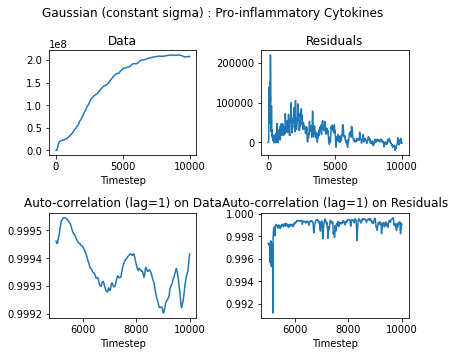

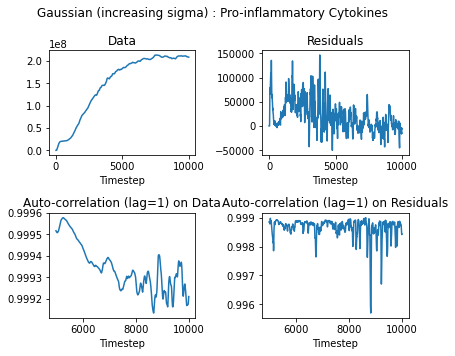

In [170]:
for choice in range(4):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Auto-correlation (lag=1)', 
         method = do_ews_auto,
         win_size = len(noise[choice])/2)